In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import umap
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
import matplotlib.cm as cm
import matplotlib.patches as mpatches

/Library/anaconda3/envs/compsci764/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns

sns.set_style('darkgrid')

In [3]:
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

In [38]:
def prepare_dataset(annotation_path, image_dir):
    annotations = pd.read_csv(annotation_path)
    image_files = [os.path.join(image_dir, file) for file in annotations['path']]

    images = []
    image_size = (224, 224)

    for file in image_files:
        img = Image.open(file).convert('RGB')
        img = img.resize(image_size)
        img_array = np.array(img)
        images.append(img_array)

    images = np.array(images)
    images = images / 255.0  # Normalize

    images_preprocessed = preprocess_input(images)

    return images_preprocessed, annotations['identity']


def extract_features(preprocessed):
    features = base_model.predict(preprocessed, batch_size=32, verbose=1)
    embedding = reducer.fit_transform(features)

    return embedding


def visualise_UMAP(labels, embedding, name):
    labels = labels.to_list()

    # Map labels to integers
    unique_labels = np.unique(labels)
    label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
    int_labels = np.array([label_to_int[label] for label in labels])

    plt.figure(figsize=(12, 8))

    # Create a colormap with enough colors
    num_labels = len(unique_labels)
    cmap = plt.cm.get_cmap('tab10', num_labels)

    # Plot the scatter plot
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=int_labels, cmap=cmap, s=32, alpha=0.4)

    # Create the legend automatically
    handles, _ = scatter.legend_elements(prop="colors", alpha=0.7)
    plt.legend(handles, unique_labels, title="Labels", bbox_to_anchor=(1, 1), loc='upper left')

    plt.title(f'{name} UMAP', size=16)
    plt.xlabel('UMAP1', size=14)
    plt.ylabel('UMAP2', size=14)
    plt.tight_layout()
    plt.show()

## Baseline

In [50]:
base_annotation = '/Users/fmb/GitHub/764WildlifeReID/megadescriptor/data/images/size-256/fca_base/annotations.csv'
base_dir = '/Users/fmb/GitHub/764WildlifeReID/megadescriptor/data/images/size-256/fca_base'

In [51]:
base_preproc, base_labels = prepare_dataset(base_annotation, base_dir)

In [52]:
base_embedding = extract_features(base_preproc)

60/60 [==============================] - 32s 530ms/step


/var/folders/r7/hlvr4tcn43d2pztz8gqr8_sc0000gn/T/ipykernel_12558/23121274.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', num_labels)


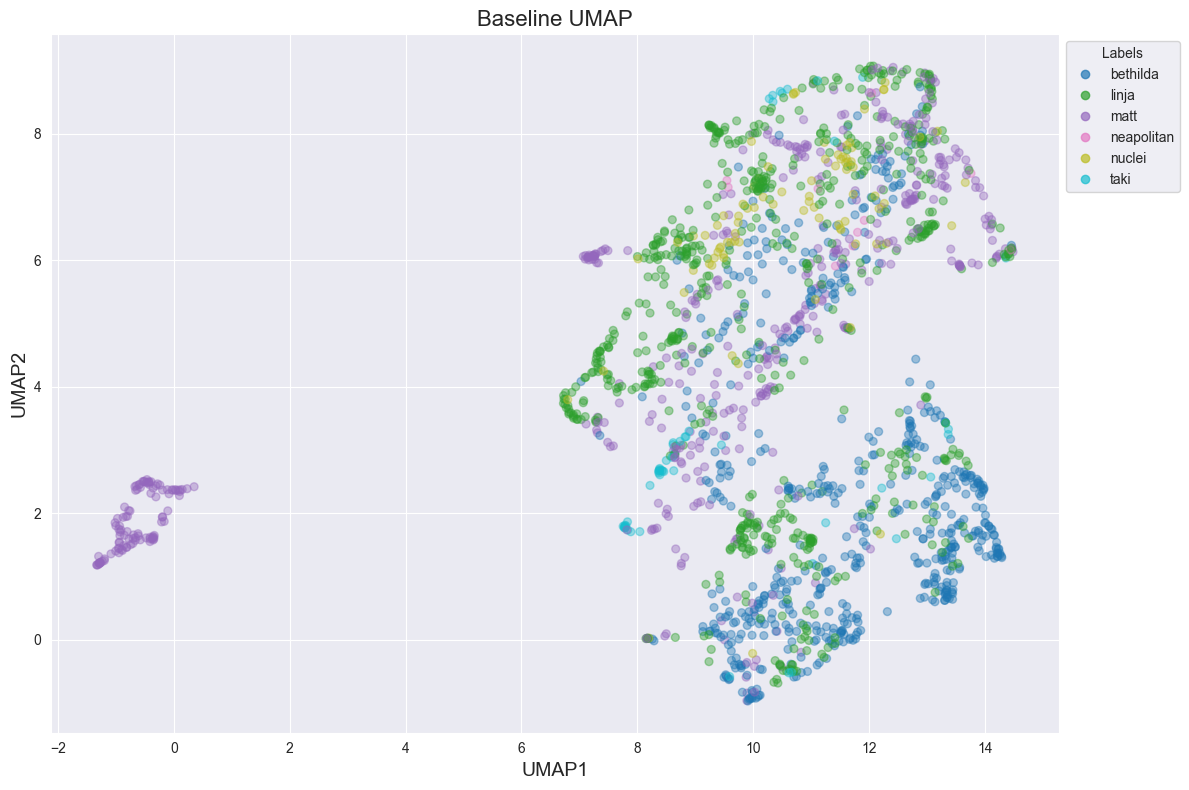

In [53]:
visualise_UMAP(base_labels, base_embedding, 'Baseline')

## MAXIM Enhanced

In [5]:
maxim_annotation = '/Users/fmb/GitHub/764WildlifeReID/megadescriptor/data/images/size-256/FeralCatsAkl_maxim/annotations.csv'
maxim_dir = '/Users/fmb/GitHub/764WildlifeReID/megadescriptor/data/images/size-256/FeralCatsAkl_maxim'

In [6]:
maxim_preproc, maxim_labels = prepare_dataset(maxim_annotation, maxim_dir)

In [7]:
maxim_embedding = extract_features(maxim_preproc)

60/60 [==============================] - 42s 685ms/step


/Library/anaconda3/envs/compsci764/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/var/folders/r7/hlvr4tcn43d2pztz8gqr8_sc0000gn/T/ipykernel_12558/23121274.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', num_labels)


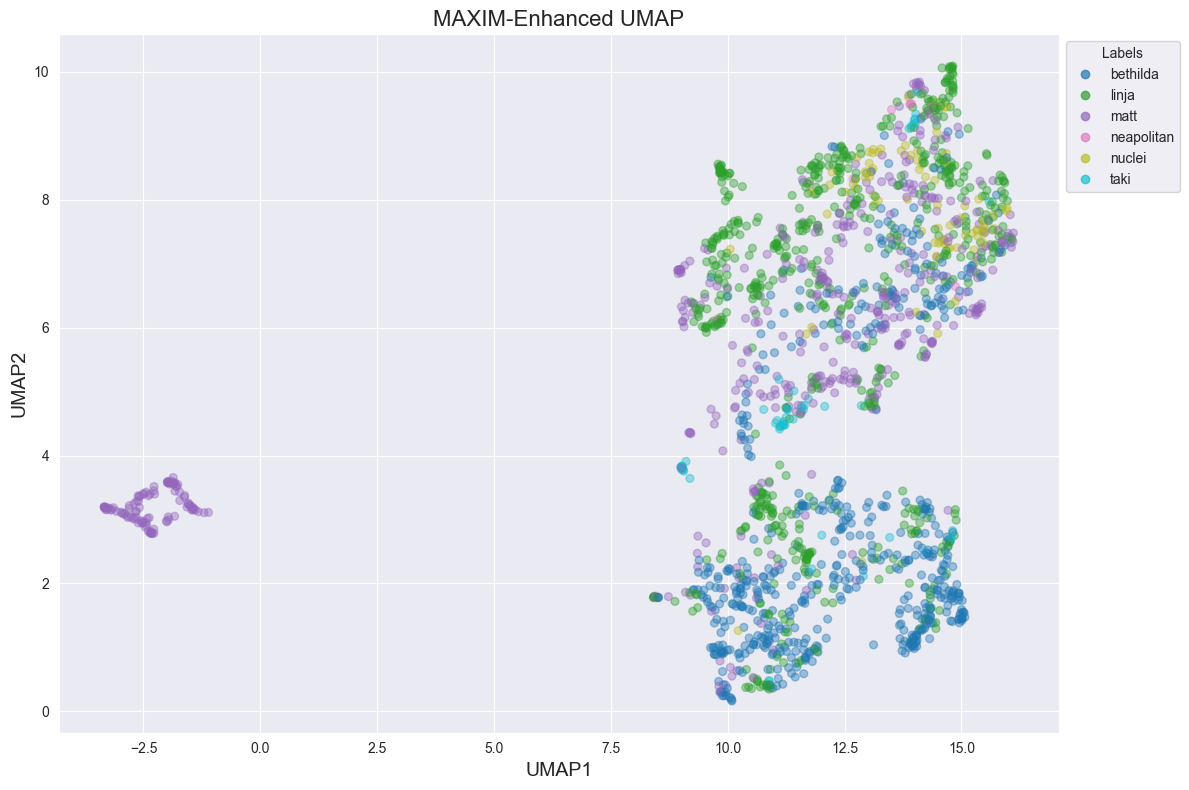

In [54]:
visualise_UMAP(hidiff_labels, maxim_embedding, 'MAXIM-Enhanced')

## HI-Diff Enhanced

In [11]:
hidiff_annotation = '/Users/fmb/GitHub/764WildlifeReID/megadescriptor/data/images/size-256/FeralCatsAkl_HIDiff/annotations.csv'
hidiff_dir = '/Users/fmb/GitHub/764WildlifeReID/megadescriptor/data/images/size-256/FeralCatsAkl_HIDiff'

In [12]:
hidiff_preproc, hidiff_labels = prepare_dataset(hidiff_annotation, hidiff_dir)

In [13]:
hidiff_embedding = extract_features(hidiff_preproc)

60/60 [==============================] - 39s 638ms/step


/var/folders/r7/hlvr4tcn43d2pztz8gqr8_sc0000gn/T/ipykernel_12558/23121274.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', num_labels)


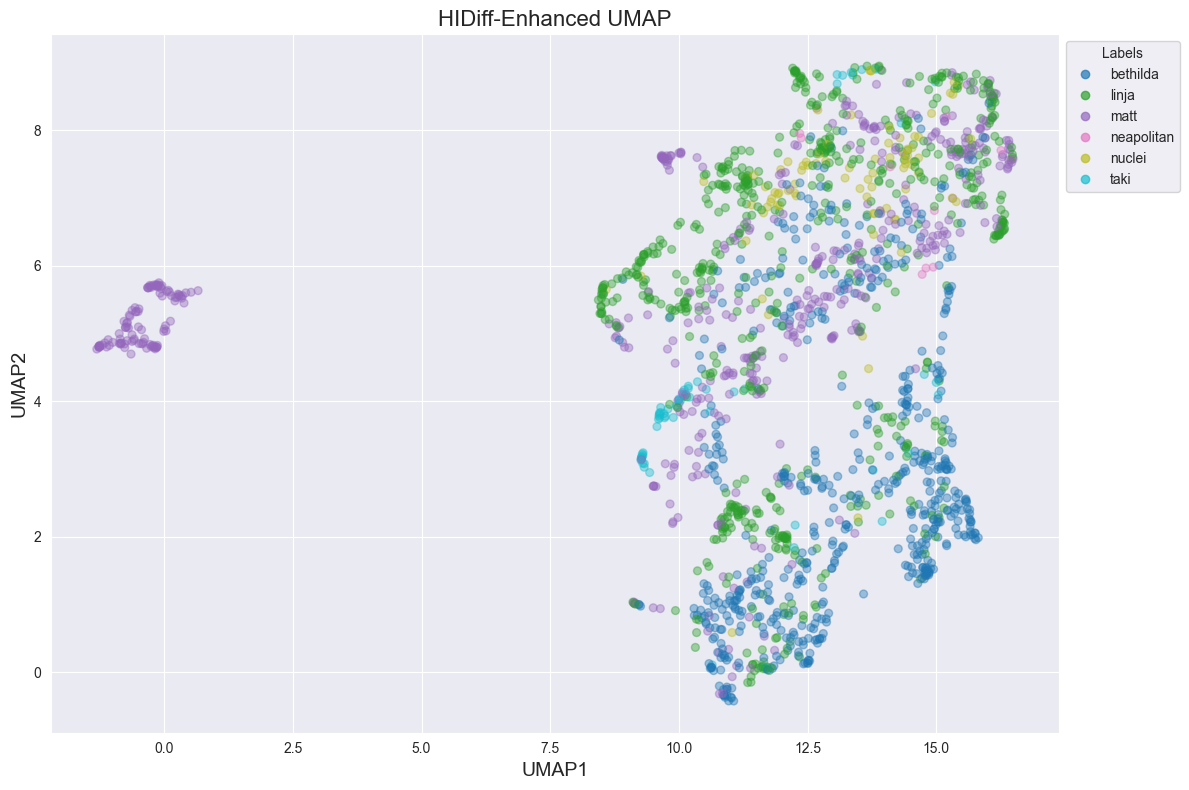

In [40]:
visualise_UMAP(hidiff_labels, hidiff_embedding, 'HIDiff-Enhanced')

## SRMNet Enhanced

In [15]:
srmnet_annotation = '/Users/fmb/GitHub/764WildlifeReID/megadescriptor/data/images/size-256/FeralCatsAkl_SRMNet/annotations.csv'
srmnet_dir = '/Users/fmb/GitHub/764WildlifeReID/megadescriptor/data/images/size-256/FeralCatsAkl_SRMNet'

In [16]:
srmnet_preproc, srmnet_labels = prepare_dataset(srmnet_annotation, srmnet_dir)

In [17]:
srmnet_embedding = extract_features(srmnet_preproc)

60/60 [==============================] - 39s 640ms/step


/var/folders/r7/hlvr4tcn43d2pztz8gqr8_sc0000gn/T/ipykernel_12558/23121274.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', num_labels)


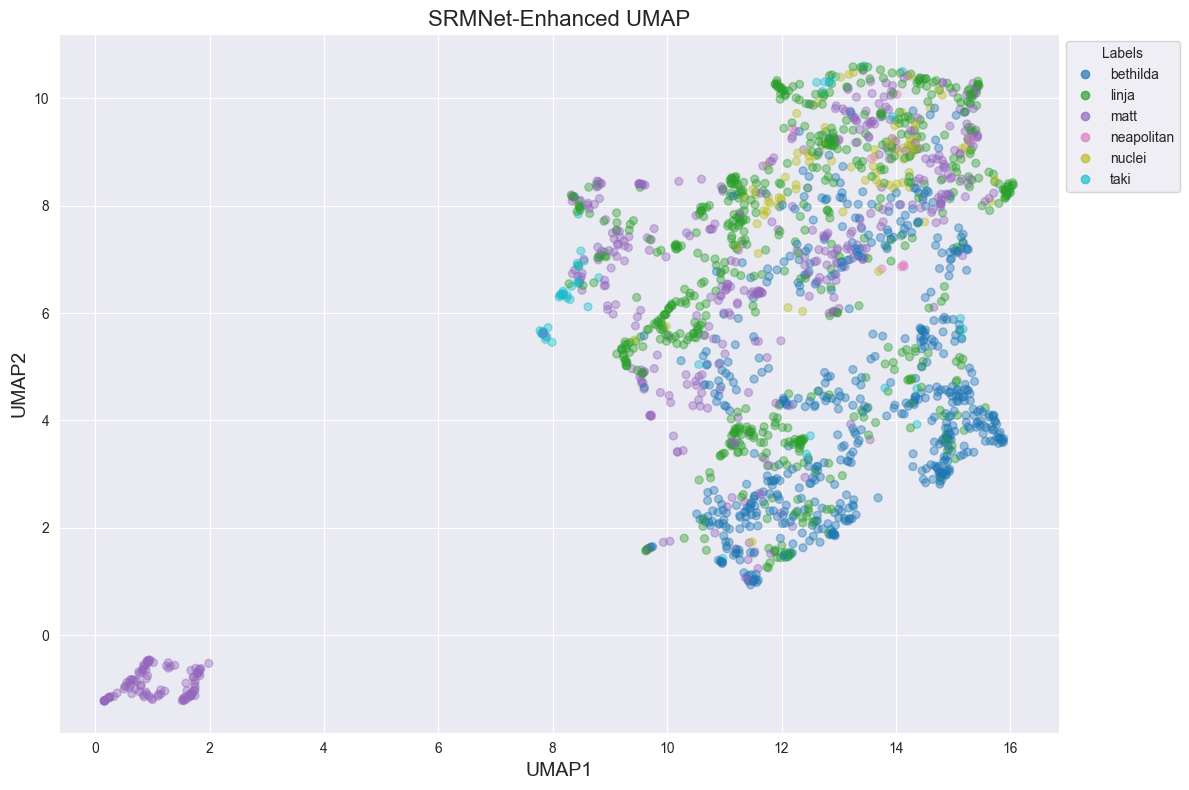

In [41]:
visualise_UMAP(hidiff_labels, srmnet_embedding, 'SRMNet-Enhanced')

In [20]:
annotations = pd.read_csv('/Users/fmb/GitHub/764WildlifeReID/megadescriptor/data/images/size-256/FeralCatsAkl_HIDiff/annotations.csv')

In [4]:
annotations

,Unnamed: 0,image_id,identity,path
0,0,3958,matt,20190801_Y4bG_AucklandIsland_A2_2_38_SD38_2019...
1,1,3150,matt,20190801_kW8J_AucklandIsland_A2_3_41_SD15_2019...
2,2,3915,matt,20190801_3vNi_AucklandIsland_B2_5_35_SD47_2019...
3,3,2356,nuclei,20190801_nYPb_AucklandIsland_B2_2_1_SD21_20190...
4,4,1581,linja,20190801_g7RF_AucklandIsland_C1_6_45_SD125_201...
...,...,...,...,...
1900,1900,1290,linja,20190801_g7RF_AucklandIsland_C1_6_45_SD125_201...
1901,1901,3073,matt,20190801_kW8J_AucklandIsland_A2_3_41_SD15_2019...
1902,1902,4172,matt,20190801_kW8J_AucklandIsland_A2_3_41_SD15_2019...
1903,1903,2923,matt,20190801_Y4bG_AucklandIsland_A2_2_38_SD38_2019...


In [5]:
# Step 1: Load and preprocess images
image_dir = '/Users/fmb/GitHub/764WildlifeReID/megadescriptor/data/images/size-256/FeralCatsAkl_HIDiff'
image_files = [os.path.join(image_dir, file) for file in annotations['path']]

images = []
image_size = (224, 224)

for file in image_files:
    img = Image.open(file).convert('RGB')
    img = img.resize(image_size)
    img_array = np.array(img)
    images.append(img_array)

images = np.array(images)
images = images / 255.0  # Normalize

In [7]:
# Step 2: Feature extraction using ResNet50
images_preprocessed = preprocess_input(images)
features = base_model.predict(images_preprocessed, batch_size=32, verbose=1)

60/60 [==============================] - 43s 710ms/step


In [8]:
features.shape

(1905, 2048)

In [10]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

/Library/anaconda3/envs/compsci764/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/var/folders/r7/hlvr4tcn43d2pztz8gqr8_sc0000gn/T/ipykernel_9854/2911347583.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', num_labels)


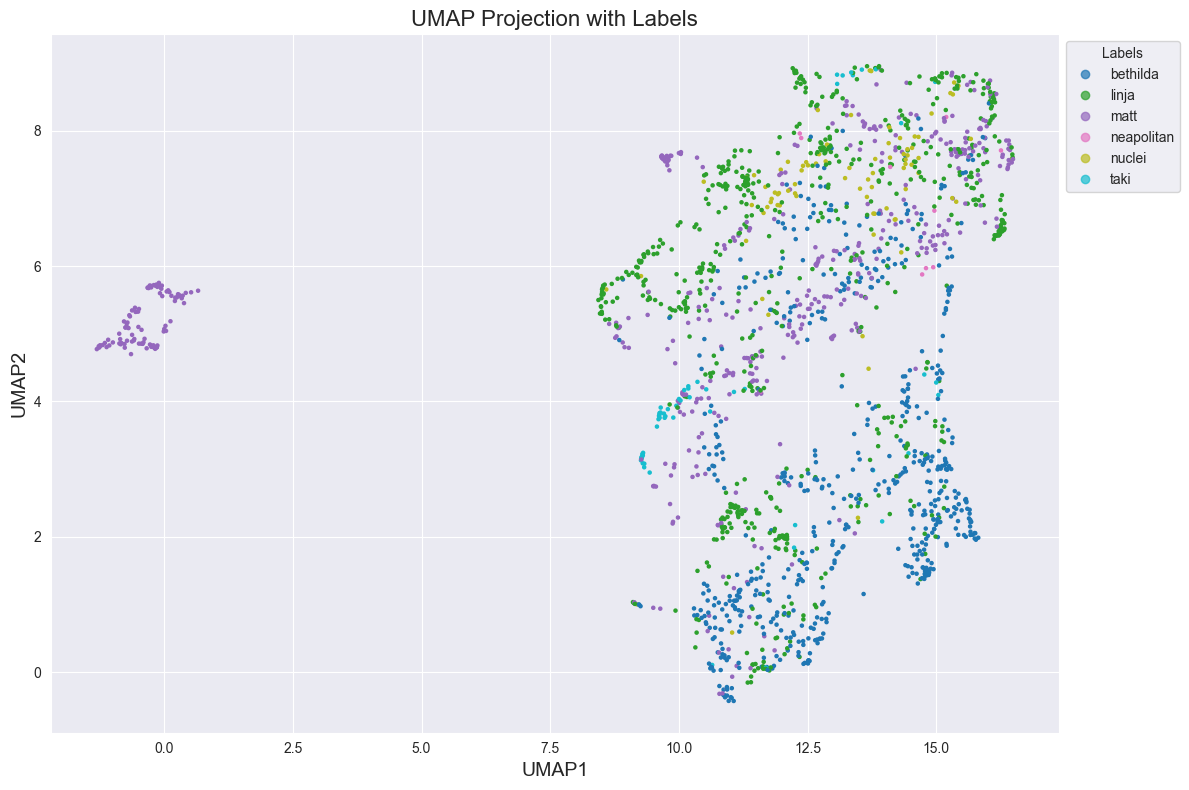

In [38]:
# Step 3: Apply UMAP

# Step 1: Load your images and labels
# Assuming you have a list of labels corresponding to each image
labels = annotations['identity'].to_list()

# Map labels to integers
unique_labels = np.unique(labels)
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
int_labels = np.array([label_to_int[label] for label in labels])

# Proceed with image preprocessing and feature extraction
# (Assuming 'features' and 'embedding' have been computed)

# Step 2: Plot the UMAP embedding with colors based on labels
plt.figure(figsize=(12, 8))

# Create a colormap with enough colors
num_labels = len(unique_labels)
cmap = plt.cm.get_cmap('tab10', num_labels)

# Plot the scatter plot
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=int_labels, cmap=cmap, s=5)

# Create the legend automatically
handles, _ = scatter.legend_elements(prop="colors", alpha=0.7)
plt.legend(handles, unique_labels, title="Labels", bbox_to_anchor=(1, 1), loc='upper left')

plt.title('UMAP Projection with Labels', size=16)
plt.xlabel('UMAP1', size=14)
plt.ylabel('UMAP2', size=14)
plt.tight_layout()
plt.show()